# Лабораторная работа 

## Текстовое описание датасета



Этот набор данных содержит 18 тысяч описаний вакансий, из которых около 800 являются поддельными. Данные состоят как из текстовой информации, так и из метаинформации о вакансиях. 

Мы видим, что столбцы (признаки) имеют имена
- `job_id` - порядковый номер
- `title` - название компании
- `location` - местоположение филиалов компании
- `department` - отрасль компании
- `salary_range` - зарплатная "вилка", указываются минимальная и максимальная зарплата
- `company_profile` - профиль компании
- `description` - описание компании 
- `requirements` - требования к работнику
- `benefits` - приемущества компании
- `telecommuting` - возможность удаленной работы
- `has_company_logo` - имеет ли компания логотип
- `has_questions` - имеется ли в компании собеседование
- `employment_type` - форма занятости
- `required_experience` - требуемый опыт работы
- `required_education` - требуемое образование
- `industry` - отрасль промшленности
- `function` - функция компании
- `fraudulent` - является ли вакансия "фейковой"

Признак `job_id` явлается порядковым признаком.

Признаки `employment_type`, `required_experience`, `required_education`, `function`, industry - номинальные (категориальные). 

Признаки `telecommuting`, `has_company_logo`, `has_questions`, `fraudulent` являются бинарными.

Остальные признаки являются текстовыми.

Требуется разделить вакансии по признаку `fraudulent`. То есть предсказать, является ли работа "фейковой" или нет.

Это задача классификации.

## Загрузка данных

In [ ]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

In [ ]:
# Импортируем библиотеки для загрузки датасета через GoogleDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Авторизация в личном аккаунте GoogleDrive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Нахождение нужного файла через его id и сохранение во временный файл 'fakejobs.csv'
file_id = '1AUcimnSYMF0V5b2Zjr5ha2n2XCYSoyzb'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('fakejobs.csv')

# Чтение датасета
data_raw = pd.read_csv('fakejobs.csv', on_bad_lines='skip')

## Просмотр датасета

Посмотрим размер загруженных данных

In [ ]:
data_raw.shape


(17880, 18)

Выведем несколько строк датасета

In [ ]:
data_raw.head()


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


## Найдем признаки с категориальным типом и преобразуем их

Столбцы 'employment_type', 'required_education', 'required_experience' и 'function' содержат категориальные значения. Пока они имеют тип 'Object'. Заменим тип на специальный, предназначенный для хранения категориальных значений:

In [ ]:
data_raw['employment_type'] = data_raw['employment_type'].astype('category')
data_raw['required_experience'] = data_raw['required_experience'].astype('category')
data_raw['required_education'] = data_raw['required_education'].astype('category')
data_raw['function'] = data_raw['function'].astype('category')
data_raw['industry'] = data_raw['industry'].astype('category')

In [ ]:
data_raw['employment_type'].dtype

CategoricalDtype(categories=['Contract', 'Full-time', 'Other', 'Part-time', 'Temporary'], ordered=False)

In [ ]:
data_raw['required_experience'].dtype

CategoricalDtype(categories=['Associate', 'Director', 'Entry level', 'Executive',
                  'Internship', 'Mid-Senior level', 'Not Applicable'],
, ordered=False)

In [ ]:
data_raw['required_education'].dtype

CategoricalDtype(categories=['Associate Degree', 'Bachelor's Degree', 'Certification',
                  'Doctorate', 'High School or equivalent', 'Master's Degree',
                  'Professional', 'Some College Coursework Completed',
                  'Some High School Coursework', 'Unspecified', 'Vocational',
                  'Vocational - Degree', 'Vocational - HS Diploma'],
, ordered=False)

In [ ]:
data_raw['function'].dtype

CategoricalDtype(categories=['Accounting/Auditing', 'Administrative', 'Advertising',
                  'Art/Creative', 'Business Analyst', 'Business Development',
                  'Consulting', 'Customer Service', 'Data Analyst', 'Design',
                  'Distribution', 'Education', 'Engineering', 'Finance',
                  'Financial Analyst', 'General Business',
                  'Health Care Provider', 'Human Resources',
                  'Information Technology', 'Legal', 'Management',
                  'Manufacturing', 'Marketing', 'Other', 'Product Management',
                  'Production', 'Project Management', 'Public Relations',
                  'Purchasing', 'Quality Assurance', 'Research', 'Sales',
                  'Science', 'Strategy/Planning', 'Supply Chain', 'Training',
                  'Writing/Editing'],
, ordered=False)

In [ ]:
data_raw['industry'].dtype

CategoricalDtype(categories=['Accounting', 'Airlines/Aviation',
                  'Alternative Dispute Resolution', 'Animation',
                  'Apparel & Fashion', 'Architecture & Planning', 'Automotive',
                  'Aviation & Aerospace', 'Banking', 'Biotechnology',
                  ...
                  'Translation and Localization',
                  'Transportation/Trucking/Railroad', 'Utilities',
                  'Venture Capital & Private Equity', 'Veterinary',
                  'Warehousing', 'Wholesale', 'Wine and Spirits', 'Wireless',
                  'Writing and Editing'],
, ordered=False)

## Статистика датасета

Выведем статистику по всем признакам датасета

In [ ]:
data_raw.describe(include = 'all')

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
count,17880.000000,17880,17534,6333,2868,14572,17879,15185,10670,17880.000000,17880.000000,17880.000000,14409,10830,9775,12977,11425,17880.000000
unique,NaN,11231,3105,1337,874,1709,14801,11968,6205,NaN,NaN,NaN,5,7,13,131,37,NaN
top,NaN,English Teacher Abroad,"GB, LND, London",Sales,0-0,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,NaN,NaN,NaN,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,NaN
freq,NaN,311,718,551,142,726,379,410,726,NaN,NaN,NaN,11620,3809,5145,1734,1749,NaN
mean,8940.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042897,0.795302,0.491723,NaN,NaN,NaN,NaN,NaN,0.048434
std,5161.655742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.202631,0.403492,0.499945,NaN,NaN,NaN,NaN,NaN,0.214688
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,4470.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,8940.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
75%,13410.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000


Выведем статистику по признакам, относящимся к категориальным

In [ ]:
data_raw.describe(include=['category'])

,employment_type,required_experience,required_education,industry,function
count,14409,10830,9775,12977,11425
unique,5,7,13,131,37
top,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology
freq,11620,3809,5145,1734,1749


## Корреляция

Выведем матрицу корреляции датасета

In [ ]:
data_raw.corr()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
job_id,1.000000,-0.004559,-0.014539,-0.087025,0.079872
telecommuting,-0.004559,1.000000,-0.019836,0.020345,0.034523
has_company_logo,-0.014539,-0.019836,1.000000,0.233932,-0.261971
has_questions,-0.087025,0.020345,0.233932,1.000000,-0.091627
fraudulent,0.079872,0.034523,-0.261971,-0.091627,1.000000


Визуализация матрицы корреляции

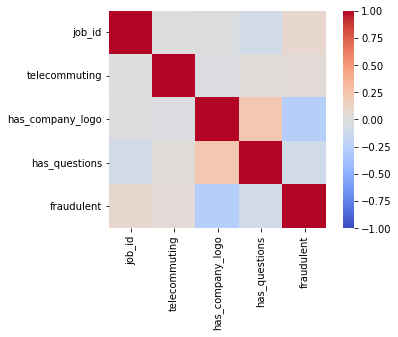

In [ ]:
sns.heatmap(data_raw.corr(), square=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')

Из этой матрицы нас больше всего интересует последняя строка: Как "фейковость" вакансии зависит от других признаков.

Видно, что из всех значимых признаков больше всех прослеживается корреляция с признаком `telecommuting` (удаленная работа)

## Обработка пропущенных значений

Посмотрим, какие признаки имеют пропущенные значения

In [ ]:
data_raw.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

Исключим из датасета столбец`job_id`. Он не несет никакой смысловой нагрузки, поэтому бесполезен.
Признаки `description`, `company_profile`, `department`, `location` и `title` так же не могут влиять на ход исследования.

Признак `salary_range` имеет смысл, но некоторые значения этого параметра невозможно привести к одному значимому значению, потому что это поле заполнялось работодателем "от руки". Значит, отследить значения этого признака не получится. Его тоже следует исключить из датасета.

Признаки `requirements` и `benefits` тоже могут повлиять на ход исследования, но также невозможно отследить алгоритмом из-за ручного заполнения.

In [ ]:
dropped_data = data_raw.drop(["job_id", "description", "company_profile", "department", "location", "title", "salary_range", "requirements", "benefits"], axis = 1)

Посмотрим, какие остались признаки, имеющие нулевые значения

In [ ]:
dropped_data.isna().sum()

telecommuting             0
has_company_logo          0
has_questions             0
employment_type        3471
required_experience    7050
required_education     8105
industry               4903
function               6455
fraudulent                0
dtype: int64

Присвоим всем нулевым значениям значения по умолчанию. Для признаков `industry`, `function` и `employment_type` возьмем значение "Other" 

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant',
                        missing_values=np.nan, fill_value='Other')
imputer.fit(dropped_data[['industry', 'function', 'employment_type']])
dropped_data[['industry', 'function', 'employment_type']] = imputer.transform(dropped_data[['industry', 'function', 'employment_type']])

Для признака `required_education` значение "Unspecified" (не определено)

In [ ]:
imputer = SimpleImputer(strategy='constant',
                        missing_values=np.nan, fill_value='Unspecified')
imputer.fit(dropped_data[['required_education']])
dropped_data[['required_education']] = imputer.transform(dropped_data[['required_education']])



Для признака `required_experience` значение "Not Applicable" (не требуется)

In [ ]:
imputer = SimpleImputer(strategy='constant',
                        missing_values=np.nan, fill_value='Not Applicable')
imputer.fit(dropped_data[['required_experience']])
dropped_data[['required_experience']] = imputer.transform(dropped_data[['required_experience']])

Посмотрим получившуюся в результате таблицу пустых значений

In [ ]:
dropped_data.isna().sum()

telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

## Обработка категориальных признаков 

Ко всем категориальным признакам будем применять метод бинаризации (one-hot encoding).

Все признаки имеют большое количество значений, особенно признак `industry`, поэтому при добавлении дополнительных столбцов таблица получится очень громоздкой. Кроме того, признак `function` частично отражает суть первого. Поэтому для оптимальной обработки датасета исключим признак `industry` из таблицы.

In [ ]:
cleared_data = dropped_data.drop("industry", axis = 1) 

Применим метод бинаризации

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse=False)
enc.fit(cleared_data[['function', 'employment_type', 'required_experience', 'required_education']])

OneHotEncoder(drop='if_binary', sparse=False)

Получим дополнительные столбцы и выведем несколько строк

In [ ]:
dummies = pd.DataFrame(enc.transform(cleared_data[['function', 'employment_type', 'required_experience', 'required_education']]), 
                       columns=enc.get_feature_names_out(), index=cleared_data.index)
dummies.head()

,function_Accounting/Auditing,function_Administrative,function_Advertising,function_Art/Creative,function_Business Analyst,function_Business Development,function_Consulting,function_Customer Service,function_Data Analyst,function_Design,...,required_education_Doctorate,required_education_High School or equivalent,required_education_Master's Degree,required_education_Professional,required_education_Some College Coursework Completed,required_education_Some High School Coursework,required_education_Unspecified,required_education_Vocational,required_education_Vocational - Degree,required_education_Vocational - HS Diploma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Добавим эти dummy-столбцы к таблице и удалим столбцы `function`, `employment_type`, `required_experience`, `required_education`

Выведем несколько строк получившейся таблицы

In [ ]:
cleared_data = pd.concat((cleared_data, dummies), axis=1).drop(['function', 'employment_type', 'required_experience', 'required_education'], axis=1)
cleared_data.head()

,telecommuting,has_company_logo,has_questions,fraudulent,function_Accounting/Auditing,function_Administrative,function_Advertising,function_Art/Creative,function_Business Analyst,function_Business Development,...,required_education_Doctorate,required_education_High School or equivalent,required_education_Master's Degree,required_education_Professional,required_education_Some College Coursework Completed,required_education_Some High School Coursework,required_education_Unspecified,required_education_Vocational,required_education_Vocational - Degree,required_education_Vocational - HS Diploma
0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Нормализация

В данном датасете отсутствуют количественные признаки. Бинарные признаки так же можно отнести к дискретным(количественным), но они и так ограничены нулем и единицей

Поэтому данный датасет не нуждается в нормализации

## Обучающая и тестовая выборки

Разобьем датасет на таблицы, одна из которых содержит классифицируемый признак, а другая все остальные, кроме него

In [ ]:
X = cleared_data.drop(['fraudulent'], axis=1)
y = cleared_data['fraudulent']

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(13410, 4470)

## Обучение

Применим Метод  𝑘  ближайших соседей ( 𝑘 NN,  𝑘  nearest neighbours)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

Протестируем нашу модель

In [ ]:
y_test_predict = knn.predict(X_test)
y_train_predict = knn.predict(X_train)

Рассчитаем ошибки и выведем их в таблицу

In [ ]:
err_test  = np.mean(y_test != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

err_table = pd.DataFrame(columns=('train', 'test'))
err_table.loc['kNN, 10 elements', :] = (err_train, err_test)
err_table

,train,test
"kNN, 10 elements",0.038404,0.042729


Возьмем значение параметра *n_neighbors* = 7

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)

y_test_predict = knn.predict(X_test)
y_train_predict = knn.predict(X_train)

err_test  = np.mean(y_test != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

err_table.loc['kNN, 7 elements', :] = (err_train, err_test)
err_table

,train,test
"kNN, 10 elements",0.038404,0.042729
"kNN, 7 elements",0.03736,0.044966


Возьмем значение параметра n_neighbors = 15

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, y_train)

y_test_predict = knn.predict(X_test)
y_train_predict = knn.predict(X_train)

err_test  = np.mean(y_test != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

err_table.loc['kNN, 15 elements', :] = (err_train, err_test)
err_table

,train,test
"kNN, 10 elements",0.038404,0.042729
"kNN, 7 elements",0.03736,0.044966
"kNN, 15 elements",0.040418,0.045414


Видим, что значение параметра выше 10 намного ухудшают качество обучения модели

Возьмем значение равное 3

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

y_test_predict = knn.predict(X_test)
y_train_predict = knn.predict(X_train)

err_test  = np.mean(y_test != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

err_table.loc['kNN, 3 elements', :] = (err_train, err_test)
err_table

,train,test
"kNN, 10 elements",0.038404,0.042729
"kNN, 7 elements",0.03736,0.044966
"kNN, 15 elements",0.040418,0.045414
"kNN, 3 elements",0.03818,0.042953


Возьмем значение равное 5

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

y_test_predict = knn.predict(X_test)
y_train_predict = knn.predict(X_train)

err_test  = np.mean(y_test != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

err_table.loc['kNN, 5 elements', :] = (err_train, err_test)
err_table

,train,test
"kNN, 10 elements",0.038404,0.042729
"kNN, 7 elements",0.03736,0.044966
"kNN, 15 elements",0.040418,0.045414
"kNN, 3 elements",0.03818,0.042953
"kNN, 5 elements",0.03654,0.044519


Возьмем значение равное 1

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

y_test_predict = knn.predict(X_test)
y_train_predict = knn.predict(X_train)

err_test  = np.mean(y_test != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

err_table.loc['kNN, 1 elements', :] = (err_train, err_test)
err_table

,train,test
"kNN, 10 elements",0.038404,0.042729
"kNN, 7 elements",0.03736,0.044966
"kNN, 15 elements",0.040418,0.045414
"kNN, 3 elements",0.03818,0.042953
"kNN, 5 elements",0.03654,0.044519
"kNN, 1 elements",0.041536,0.051454


Возьмем значение равное 4

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)

y_test_predict = knn.predict(X_test)
y_train_predict = knn.predict(X_train)

err_test  = np.mean(y_test != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

err_table.loc['kNN, 4 elements', :] = (err_train, err_test)
err_table

,train,test
"kNN, 10 elements",0.038404,0.042729
"kNN, 7 elements",0.03736,0.044966
"kNN, 15 elements",0.040418,0.045414
"kNN, 3 elements",0.03818,0.042953
"kNN, 5 elements",0.03654,0.044519
"kNN, 1 elements",0.041536,0.051454
"kNN, 4 elements",0.036689,0.044966


## Вывод

По результатам обучения модели можно определить лучшие значения параметра. Это значения 10 и 3. Но разница между ними не столько велика, чтобы можно было с точностью определить оптимальный параметр.

Значение ошибки на тестовой выборке оказалось больше, чем на тренировочной, поэтому можно сделать вывод, что переобучения модели не произошло.

Ошибка достаточно мала, поэтому можно сказать, что подготовка датасета и обучение прошли успешно.

# Лабораторная работа №5

## Импортируем необходимые библиотеки

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## Обучение логистической регресии

In [ ]:
logreg = LogisticRegression(solver='lbfgs', max_iter=200)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [ ]:
y_pred_test = logreg.predict(X_test)
print('Точность логистической регрессии на тестовом наборе: {:.2f}'.format(logreg.score(X_test, y_test)))

Точность логистической регрессии на тестовом наборе: 0.95


In [ ]:
y_pred_train = logreg.predict(X_train)
print('Точность логистической регрессии на тренировочном наборе: {:.2f}'.format(logreg.score(X_train, y_train)))

Точность логистической регрессии на тренировочном наборе: 0.95


Нет недообучения и переобучения

Выведем матрицу ошибок

In [ ]:
matrix = confusion_matrix(y_pred_test, y_test)
print(matrix)

[[4242  201]
 [   5   22]]


Получилось, что у нас 4242+22 верных прогноза и 201+5 - ошибочных

## Обучение RandomForestClassifier

Будем варировать параметр n_estimators и наблюдать за изменением ошибок

In [ ]:
train_errors = []
test_errors = []

est_vals = [x for x in range(75,301,25)]

for i in est_vals:
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train, y_train)

    y_pred_test = rfc.predict(X_test)
    err_train = np.mean(y_train != rfc.predict(X_train))
    err_test  = np.mean(y_test  != y_pred_test)
    
    train_errors.append(err_train)
    test_errors.append(err_test)
    print("n_estimators = ", i)
    print("err_train:", err_train)
    print("err_test:", err_test)
    print("---------")

n_estimators =  75
err_train: 0.031170768083519762
err_test: 0.0407158836689038
---------
n_estimators =  100
err_train: 0.031170768083519762
err_test: 0.0407158836689038
---------
n_estimators =  125
err_train: 0.031170768083519762
err_test: 0.04049217002237136
---------
n_estimators =  150
err_train: 0.031170768083519762
err_test: 0.040268456375838924
---------
n_estimators =  175
err_train: 0.031170768083519762
err_test: 0.040044742729306484
---------
n_estimators =  200
err_train: 0.031170768083519762
err_test: 0.040044742729306484
---------
n_estimators =  225
err_train: 0.031170768083519762
err_test: 0.0407158836689038
---------
n_estimators =  250
err_train: 0.031170768083519762
err_test: 0.040044742729306484
---------
n_estimators =  275
err_train: 0.031170768083519762
err_test: 0.0407158836689038
---------
n_estimators =  300
err_train: 0.031170768083519762
err_test: 0.04049217002237136
---------


Визуализируем получившиеся данные

Text(0, 0.5, 'error')

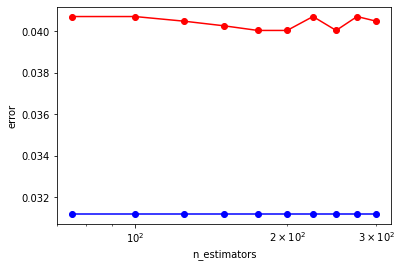

In [ ]:
plt.semilogx(est_vals, train_errors, 'b-o', label = 'train')
plt.semilogx(est_vals, test_errors, 'r-o', label = 'test')
plt.xlabel('n_estimators')
plt.ylabel('error')

Разница в ошибке составляет примерно ~0.9, что можно считать незначительной. Поэтому недообучения или переобучения не произошло. Лучший результат достигается при n_estimators =  125

Выведем матрицу ошибок

In [ ]:
matrix = confusion_matrix(y_pred_test, y_test)
print(matrix)

[[4228  162]
 [  19   61]]


Получилось, что у нас 4229+61 верных прогноза и 162+18 - ошибочных

## Полносвязная нейронная сеть

Обучим полносвязную нейронную сеть с одним скрытым слоем

In [ ]:
nn_model = MLPClassifier(hidden_layer_sizes = (100,),
                          solver = 'lbfgs',
                          activation = 'logistic', 
                         max_iter = 300)
nn_model.fit(X_train, y_train)
nn_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_pred_test = nn_model.predict(X_test)
print('Точность нейронной сети на тестовом наборе: {:.2f}'.format(nn_model.score(X_test, y_test)))

Точность нейронной сети на тестовом наборе: 0.96


In [ ]:
y_pred_train = nn_model.predict(X_train)
print('Точность нейронной на тренировочном наборе: {:.2f}'.format(nn_model.score(X_train, y_train)))

Точность нейронной на тренировочном наборе: 0.97


Ошибка достаточно мала, поэтому можно сказать, что подготовка датасета и обучение прошли успешно.

In [ ]:
matrix = confusion_matrix(y_pred_test, y_test)
print(matrix)

[[4224  160]
 [  23   63]]


Получилось, что у нас 4218+71 верных прогноза и 29+152 - ошибочных

Будем варьировать альфа и отслеживать лучший результат

In [ ]:
train_errors = []
test_errors = []

alpha_vals = [x for x in range(0,30,2)]

for i in alpha_vals:
    nn_model = MLPClassifier(alpha = i,
                             hidden_layer_sizes = (100,),
                          solver = 'lbfgs',
                          activation = 'logistic', 
                         max_iter = 350)
    nn_model.fit(X_train, y_train)

    y_pred_test = nn_model.predict(X_test)
    err_train = np.mean(y_train != nn_model.predict(X_train))
    err_test  = np.mean(y_test  != y_pred_test)
    
    train_errors.append(err_train)
    test_errors.append(err_test)
    print("alpha = ", i)
    print("err_train:", err_train)
    print("err_test:", err_test)
    print("---------")

alpha =  0
err_train: 0.031170768083519762
err_test: 0.04093959731543624
---------
alpha =  2
err_train: 0.03974645786726324
err_test: 0.042953020134228186
---------
alpha =  4
err_train: 0.04258016405667412
err_test: 0.0436241610738255
---------
alpha =  6
err_train: 0.043027591349739
err_test: 0.0436241610738255
---------
alpha =  8
err_train: 0.04541387024608501
err_test: 0.046085011185682326
---------
alpha =  10
err_train: 0.045786726323639074
err_test: 0.046085011185682326
---------
alpha =  12
err_train: 0.04675615212527964
err_test: 0.0476510067114094
---------
alpha =  14
err_train: 0.04675615212527964
err_test: 0.0476510067114094
---------
alpha =  16
err_train: 0.04690529455630127
err_test: 0.04787472035794183
---------
alpha =  18
err_train: 0.04697986577181208
err_test: 0.04787472035794183
---------
alpha =  20
err_train: 0.047949291573452645
err_test: 0.04988814317673378
---------
alpha =  22
err_train: 0.047949291573452645
err_test: 0.04988814317673378
---------
alpha = 

Визуализируем получившиеся данные

Text(0, 0.5, 'error')

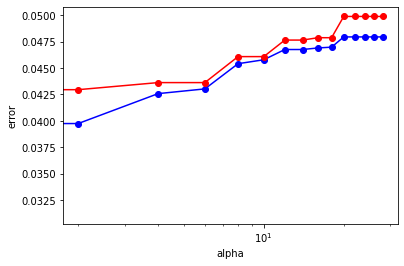

In [ ]:
plt.semilogx(alpha_vals, train_errors, 'b-o', label = 'train')
plt.semilogx(alpha_vals, test_errors, 'r-o', label = 'test')
plt.xlabel('alpha')
plt.ylabel('error')

In [ ]:
y_pred_test = nn_model.predict(X_test)
print('Точность нейронной сети на тестовом наборе: {:.2f}'.format(nn_model.score(X_test, y_test)))

Точность нейронной сети на тестовом наборе: 0.95


In [ ]:
y_pred_train = nn_model.predict(X_train)
print('Точность нейронной на тренировочном наборе: {:.2f}'.format(nn_model.score(X_train, y_train)))

Точность нейронной на тренировочном наборе: 0.95


Выведем матрицу ошибок

In [ ]:
matrix = confusion_matrix(y_pred_test, y_test)
print(matrix)

[[4247  223]
 [   0    0]]


Наилучшее значение альфа равно нулю


Будем варьировать количество нейронов при фиксированном значении альфа.

In [ ]:
train_errors = []
test_errors = []
element_vals = [x for x in range(10,311,50)]

for i in element_vals:
    nn_model = MLPClassifier(alpha = 0,
                             hidden_layer_sizes = (i,),
                          solver = 'lbfgs',
                          activation = 'logistic', 
                         max_iter = 700)
    nn_model.fit(X_train, y_train)

    y_pred_test = nn_model.predict(X_test)
    err_train = np.mean(y_train != nn_model.predict(X_train))
    err_test  = np.mean(y_test  != y_pred_test)
    
    train_errors.append(err_train)
    test_errors.append(err_test)
    print("elements = ", i)
    print("err_train:", err_train)
    print("err_test:", err_test)
    print("---------")

alpha =  10
err_train: 0.03184190902311708
err_test: 0.042729306487695747
---------
alpha =  60
err_train: 0.031170768083519762
err_test: 0.04161073825503356
---------
alpha =  110
err_train: 0.031170768083519762
err_test: 0.041834451901566
---------
alpha =  160
err_train: 0.031170768083519762
err_test: 0.040268456375838924
---------
alpha =  210
err_train: 0.031170768083519762
err_test: 0.042729306487695747
---------
alpha =  260
err_train: 0.031170768083519762
err_test: 0.041834451901566
---------
alpha =  310
err_train: 0.031170768083519762
err_test: 0.042281879194630875
---------


Визуализируем получившиеся данные

Text(0, 0.5, 'error')

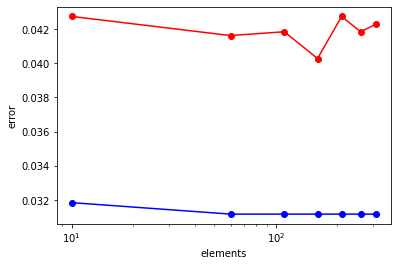

In [ ]:
plt.semilogx(element_vals, train_errors, 'b-o', label = 'train')
plt.semilogx(element_vals, test_errors, 'r-o', label = 'test')
plt.xlabel('elements')
plt.ylabel('error')

Лучший результат достигается при размере 260

In [ ]:
y_pred_test = nn_model.predict(X_test)
print('Точность нейронной сети на тестовом наборе: {:.2f}'.format(nn_model.score(X_test, y_test)))

Точность нейронной сети на тестовом наборе: 0.96


In [ ]:
y_pred_train = nn_model.predict(X_train)
print('Точность нейронной на тренировочном наборе: {:.2f}'.format(nn_model.score(X_train, y_train)))

Точность нейронной на тренировочном наборе: 0.97


Выведем матрицу ошибок

In [ ]:
matrix = confusion_matrix(y_pred_test, y_test)
print(matrix)

[[4215  157]
 [  32   66]]


Получилось, что у нас 4215+66 верных прогноза и 32+157 - ошибочных

## Вывод

Все методы обладают почти одинаковой точностью. Лучший метод выбрать сложно, но при изменениях параметров метода можно достить бОльшей точности.